# Allstate Corporation

## First, check configuration:

In [8]:
#!/bin/bash
!echo "Configuration environment:\n"
!python --version >> config-environment.txt
!which python >> config-environment.txt
!pip --version >> config-environment.txt
!conda --version >> config-environment.txt
!which conda >> config-environment.txt

!cat config-environment.txt

# Libraries
!~/anaconda3/bin/pip freeze > requeriments.txt

Configuration environment:

Python 3.7.1
/home/campos/anaconda3/bin/python
pip 18.1 from /home/campos/anaconda3/lib/python3.7/site-packages/pip (python 3.7)
conda 4.5.12
/home/campos/anaconda3/bin/conda


## Imports

In [32]:
# data analysis and data wrangling
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Other
from sklearn.preprocessing import LabelEncoder
import gc # clear RAM
import warnings
import time

## Format cell

In [33]:
# guarantees visualization inside the jupyter
%matplotlib inline 

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load dataset

In [34]:
# load data in dataset
df_train = pd.read_csv("~/projetos/challenges/kaggle/allstate-claims-severity/data_base/train.csv",
                       encoding='utf-8')
df_test = pd.read_csv("~/projetos/challenges/kaggle/allstate-claims-severity/data_base/test.csv",
                      encoding='utf-8')

## Merge Data Sets

Merged the training and test sets temporarily.

In [35]:
# merge datasets
frames = [df_train, df_test]
data = pd.concat(frames)
print("The merge datasets train and test:\n{} rows\n{} columns".format(data.shape[0], data.shape[1]))

The merge datasets train and test:
313864 rows
132 columns


## Data analysis 

#### Conjuntos de dados e entradas
The dataset contains 2 .csv files with information needed to make a forecast. They are::<br/>
1. Variables in train.csv and test.csv: 
 - **id:** the id of a couple of questions from the training set
 - **cat1 to cat116:** category variables (the range of values is not provided, nor the column names).
 - **cont1 to cont14:** continuous variables (the range of values is not provided nor the names of the columns).
 - **loss:** the amount that the company has to pay for a particular claim. This is the target variable.
 
 
 NOTE: In test.csv, the loss is not present, since we will predict this.

In [36]:
# Size and types of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313864 entries, 0 to 125545
Columns: 132 entries, cat1 to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 318.5+ MB


### Data Type
Within _data_ there are 3 types of data: <br/>
- float64(15) = continuos_feature + loss
- int64(1) = id
- object(116) = categorical_feature

In [37]:
data.head()

cat1 cat10 cat100 cat101 cat102 cat103 cat104 cat105 cat106 cat107 cat108  \
0    A     A      B      G      A      A      I      E      G      J      G   
1    A     B      L      F      A      A      E      E      I      K      K   
2    A     B      L      O      A      B      E      F      H      F      A   
3    B     A      I      D      A      A      E      E      I      K      K   
4    A     B      F      J      A      A      D      E      K      G      B   

  cat109 cat11 cat110 cat111 cat112 cat113 cat114 cat115 cat116 cat12 cat13  \
0     BU     B     BC      C     AS      S      A      O     LB     A     A   
1     BI     A     CQ      A     AV     BM      A      O     DP     A     A   
2     AB     B     DK      A      C     AF      A      I     GK     B     B   
3     BI     A     CS      C      N     AE      A      O     DJ     A     A   
4      H     A      C      C      Y     BM      A      K     CK     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat2 cat20 cat21 cat22 cat23 cat24  \
0     A     A     A     A     A     A    B     A     A     A     B     A   
1     A     A     A     A     A     A    B     A     A     A     A     A   
2     A     A     A     A     A     A    B     A     A     A     A     A   
3     A     A     A     A     A     A    B     A     A     A     B     A   
4     A     A     A     A     A     A    B     A     A     A     B     A   

  cat25 cat26 cat27 cat28 cat29 cat3 cat30 cat31 cat32 cat33 cat34 cat35  \
0     A     A     A     A     A    A     A     A     A     A     A     A   
1     A     A     A     A     A    A     A     A     A     A     A     A   
2     A     A     A     A     A    A     A     A     A     A     A     A   
3     A     A     A     A     A    A     A     A     A     A     A     A   
4     A     A     A     A     A    A     A     A     A     A     A     A   

  cat36 cat37 cat38 cat39 cat4 cat40 cat41 cat42 cat43 cat44 cat45 cat46  \
0     A     A     A     A    B     A     A     A     A     A     A     A   
1     A     A     A     A    A     A     A     A     A     A     A     A   
2     B     A     A     A    A     A     A     A     A     A     A     A   
3     A     A     A     A    B     A     A     A     A     A     A     A   
4     A     A     A     A    B     A     A     A     A     A     A     A   

  cat47 cat48 cat49 cat5 cat50 cat51 cat52 cat53 cat54 cat55 cat56 cat57  \
0     A     A     A    A     A     A     A     A     A     A     A     A   
1     A     A     A    A     A     A     A     A     A     A     A     A   
2     A     A     A    B     A     A     A     A     A     A     A     A   
3     A     A     A    A     A     A     A     A     A     A     A     A   
4     A     A     A    A     A     A     A     A     A     A     A     A   

  cat58 cat59 cat6 cat60 cat61 cat62 cat63 cat64 cat65 cat66 cat67 cat68  \
0     A     A    A     A     A     A     A     A     A     A     A     A   
1     A     A    A     A     A     A     A     A     A     A     A     A   
2     A     A    A     A     A     A     A     A     A     A     A     A   
3     A     A    A     A     A     A     A     A     A     A     A     A   
4     A     A    A     A     A     A     A     A     A     A     A     A   

  cat69 cat7 cat70 cat71 cat72 cat73 cat74 cat75 cat76 cat77 cat78 cat79 cat8  \
0     A    A     A     A     A     A     A     B     A     D     B     B    A   
1     A    A     A     A     A     A     A     A     A     D     B     B    A   
2     A    A     A     A     A     A     A     A     A     D     B     B    A   
3     A    A     A     A     A     B     A     A     A     D     B     B    A   
4     A    A     A     A     B     A     A     A     A     D     B     D    A   

  cat80 cat81 cat82 cat83 cat84 cat85 cat86 cat87 cat88 cat89 cat9 cat90  \
0     D     D     B     D     C     B     D     B     A     A    B     A   
1     D     D     A     B     C     B     D     B     A     A    B     A   
2     B     D     B     D     C     B     B     B   

In [38]:
# describing statistics of categorical variables
data.describe(include = ['object'])

cat1   cat10  cat100  cat101  cat102  cat103  cat104  cat105  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2      15      19       9      14      17      20   
top          A       A       F       A       A       A       E       E   
freq    235646  267157   71817  177924  295386  206019   71557  127477   

        cat106  cat107  cat108  cat109   cat11  cat110  cat111  cat112  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique      18      20      11      85       2     134      17      51   
top          G       F       B      BI       A      CL       A       E   
freq     78180   78863  108731  255052  280656   42097  214421   42109   

        cat113  cat114  cat115  cat116   cat12   cat13   cat14   cat15  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique      63      19      23     349       2       2       2       2   
top         BM       A       K      HK       A       A       A       A   
freq     43756  219707   73027   35076  266602  281455  309995  313807   

         cat16   cat17   cat18   cat19    cat2   cat20   cat21   cat22  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    303105  311675  312233  310886  177924  313548  313196  313794   

         cat23   cat24   cat25   cat26   cat27   cat28   cat29    cat3  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    262717  303407  283374  295196  280489  301689  307686  296745   

         cat30   cat31   cat32   cat33   cat34   cat35   cat36   cat37  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    308007  305041  311830  312275  312918  313522  260348  276241   

         cat38   cat39    cat4   cat40   cat41   cat42   cat43   cat44  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    282097  305563  214421  300200  302017  310966  306921  287701   

         cat45   cat46   cat47   cat48   cat49    cat5   cat50   cat51  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    306638  312408  312672  313415  298622  206019  229499  311832   

         cat52   cat53   cat54   cat55   cat56   cat57   cat58   cat59  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    299266  288337  306339  313622  313571  308856  313472  313358   

          cat6   cat60   cat61   cat62   cat63   cat64   cat65   cat66  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    219707  313161  312620  313798  313740  313795  310077  299912   

         cat67   cat68   cat69    cat7   cat70   cat71   cat72   cat73  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       3   
top          A       A       A       A       A       A       A       A   
freq

In [39]:
# Types data in collumns
print(data.dtypes)

cat1       object
cat10      object
cat100     object
cat101     object
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat11      object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat2       object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
cat3       object
cat30      object
cat31      object
cat32      object
cat33      object
cat34      object
cat35      object
cat36      object
cat37      object
cat38      object
cat39      object
cat4       object
cat40      object
cat41      object
cat42      object
cat43      object
cat44     

## Data Cleanning

- Check missing values
- Sepearte the categorical and continous features
- Check unique values
- Transformations
- Variable id for submission

In [40]:
# Check each columns by values missing

missing = data.isnull().any()

for i in missing:
    if i == True:
        print ("Column contains values missing !")

print("There are now {} missing values in the loss column".format(data['loss'].isnull().sum()))

Column contains values missing !
There are now 125546 missing values in the loss column


In [41]:
# Sepearte the categorical and continous features

continuous_features = []
categorical_features = []

for i in data.columns:
    if 'cont' in i:
        continuous_features.append(i)
    elif 'cat' in i:
        categorical_features.append(i)

print("Continuos Features: \n{} \n".format(continuous_features))
print("Categorical Features : \n{}\n".format(categorical_features))

Continuos Features: 
['cont1', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9'] 

Categorical Features : 
['cat1', 'cat10', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat11', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat2', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat3', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat4', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat5', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat6', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat7', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 

In [42]:
# Explore the unique values in the feature columns.

cat_uniques = []
for cat in categorical_features:
    cat_uniques.append(len(df_train[cat].unique()))
    
unique_values = pd.DataFrame({'cat_name': categorical_features, 'unique_values': cat_uniques})
print(unique_values)

    cat_name  unique_values
0       cat1              2
1      cat10              2
2     cat100             15
3     cat101             19
4     cat102              9
5     cat103             13
6     cat104             17
7     cat105             20
8     cat106             17
9     cat107             20
10    cat108             11
11    cat109             84
12     cat11              2
13    cat110            131
14    cat111             16
15    cat112             51
16    cat113             61
17    cat114             19
18    cat115             23
19    cat116            326
20     cat12              2
21     cat13              2
22     cat14              2
23     cat15              2
24     cat16              2
25     cat17              2
26     cat18              2
27     cat19              2
28      cat2              2
29     cat20              2
30     cat21              2
31     cat22              2
32     cat23              2
33     cat24              2
34     cat25        

In [43]:
print(unique_values.describe())

       unique_values
count     116.000000
mean        9.818966
std        33.666807
min         2.000000
25%         2.000000
50%         2.000000
75%         4.000000
max       326.000000


## Data Preprocessing

### Log _loss_ transform
- Log transform help data to make gaussian distribuition

In [44]:
log_loss = np.log(data['loss'])

default_loss = data['loss']

### Convert categorical string values to numeric values

There are 116 categories with non alphanumeric values, most of the machine learning algorithms doesn't work with alpha numeric values. So, lets convert it into numeric values

In [45]:
# data df
# first, convert the categorical variables into numbers

data_copy = data.copy().loc[:, categorical_features]

for cat_feat in data_copy.columns:
    data_copy[cat_feat] = pd.factorize(data_copy[cat_feat], sort=True)[0]

In [46]:
data_copy.head()

cat1  cat10  cat100  cat101  cat102  cat103  cat104  cat105  cat106  \
0     0      0       1       6       0       0       8       4       6   
1     0      1      11       5       0       0       4       4       8   
2     0      1      11      14       0       1       4       5       7   
3     1      0       8       3       0       0       4       4       8   
4     0      1       5       9       0       0       3       4      10   

   cat107  cat108  cat109  cat11  cat110  cat111  cat112  cat113  cat114  \
0       9       6      46      1      28       2      19      57       0   
1      10      10      34      0      67       0      22      39       0   
2       5       0       2      1      87       0      28       6       0   
3      10      10      34      0      69       2      39       5       0   
4       6       1      67      0      51       2      50      39       0   

   cat115  cat116  cat12  cat13  cat14  cat15  cat16  cat17  cat18  cat19  \
0      14     288      0      0      0      0      0      0      0      0   
1      14      94      0      0      0      0      0      0      0      0   
2       8     167      1      1      0      0      0      0      0      0   
3      14      88      0      0      0      0      0      0      0      0   
4      10      63      1      0      0      0      0      0      0      0   

   cat2  cat20  cat21  cat22  cat23  cat24  cat25  cat26  cat27  cat28  cat29  \
0     1      0      0      0      1      0      0      0      0      0      0   
1     1      0      0      0      0      0      0      0      0      0      0   
2     1      0      0      0      0      0      0      0      0      0      0   
3     1      0      0      0      1      0      0      0      0      0      0   
4     1      0      0      0      1      0      0      0      0      0      0   

   cat3  cat30  cat31  cat32  cat33  cat34  cat35  cat36  cat37  cat38  cat39  \
0     0      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     0      0      0      0      0      0      0      1      0      0      0   
3     0      0      0      0      0      0      0      0      0      0      0   
4     0      0      0      0      0      0      0      0      0      0      0   

   cat4  cat40  cat41  cat42  cat43  cat44  cat45  cat46  cat47  cat48  cat49  \
0     1      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     0      0      0      0      0      0      0      0      0      0      0   
3     1      0      0      0      0      0      0      0      0      0      0   
4     1      0      0      0      0      0      0      0      0      0      0   

   cat5  cat50  cat51  cat52  cat53  cat54  cat55  cat56  cat57  cat58  cat59  \
0     0      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     1      0      0      0      0      0      0      0      0      0      0   
3     0      0      0      0      0      0      0      0      0      0      0   
4     0      0      0      0      0      0      0      0      0      0      0   

   cat6  cat60  cat61  cat62  cat63  cat64  cat65  cat66  cat67  cat68  cat69  \
0     0      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     0      0      0      0      0      0      0      0      0      0      0   
3     0      0      0      0      0      0      0      0      0      0      0   
4     0      0      0      0      0      0      0      0      0      0      0   

   cat7  cat70  cat71  cat72  cat73  cat74  cat75  cat76  cat77  cat78  cat79  \
0     0      0      0      0      0      0      1      0      3      1      1   
1     0      0      0      0      0      

In [47]:
# # test df
# # convert the categorical variables into numbers

# data_copy_test = df_test.copy().loc[:, categorical_features]

# for cat_feat in data_copy_test.columns:
#     data_copy_test[cat_feat] = pd.factorize(data_copy_test[cat_feat], sort=True)[0]

In [48]:
# data_copy_test.head()

In [49]:
# for cat_feat in categorical_features:
#     data_copy[cat_feat] = pd.factorize(data_copy[cat_feat], sort=True)[0]

In [50]:
# data_copy.head()

In [51]:
# for cat_feat in categorical_features:
#     data_copy_test[cat_feat] = pd.factorize(data_copy_test[cat_feat], sort=True)[0]

In [52]:
# data_copy_test.head()

In [53]:
# np.all(np.isfinite(data_copy_test))

In [54]:
# np.any(np.isnan(data_copy_test))

### Store _ids_ to later preparing submission

In [55]:
test_ids = data['id']

## Feature enginer

- Loss Variable
- Continuous feature
 - Visualize data continuos
 - Correlation data continuos
 - Matrix correlation: continuous features
- Categorical feature
 - Transform categorical feature
 - Visualize data categorical
 - Matrix correlation: categorical features

### _Loss_ target

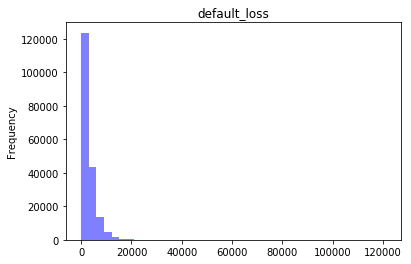

In [56]:
# Plot showing loss distribution
plt.figure()
default_loss.plot.hist(alpha=0.5, color = 'blue', bins = 40)
plt.title("default_loss")
plt.show()

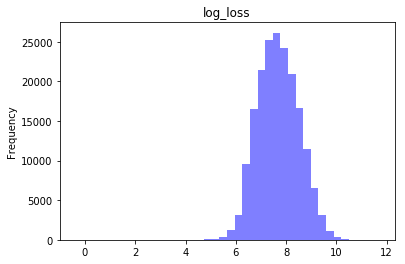

In [57]:
# Plot showing loss distribution
plt.figure()
log_loss.plot.hist(alpha=0.5, color = 'blue', bins = 40)
plt.title("log_loss")
plt.show()

It`s possible see that it is skewed to the left.

### Continuos features

In [25]:
# Separete datas in list with feature loss

continuous_types = []
categorical_types = []

for i in data.columns:
    if df_train[i].dtype == 'float':
        continuous_types.append(i)
    else:
        categorical_types.append(i)
categorical_types.remove('id')

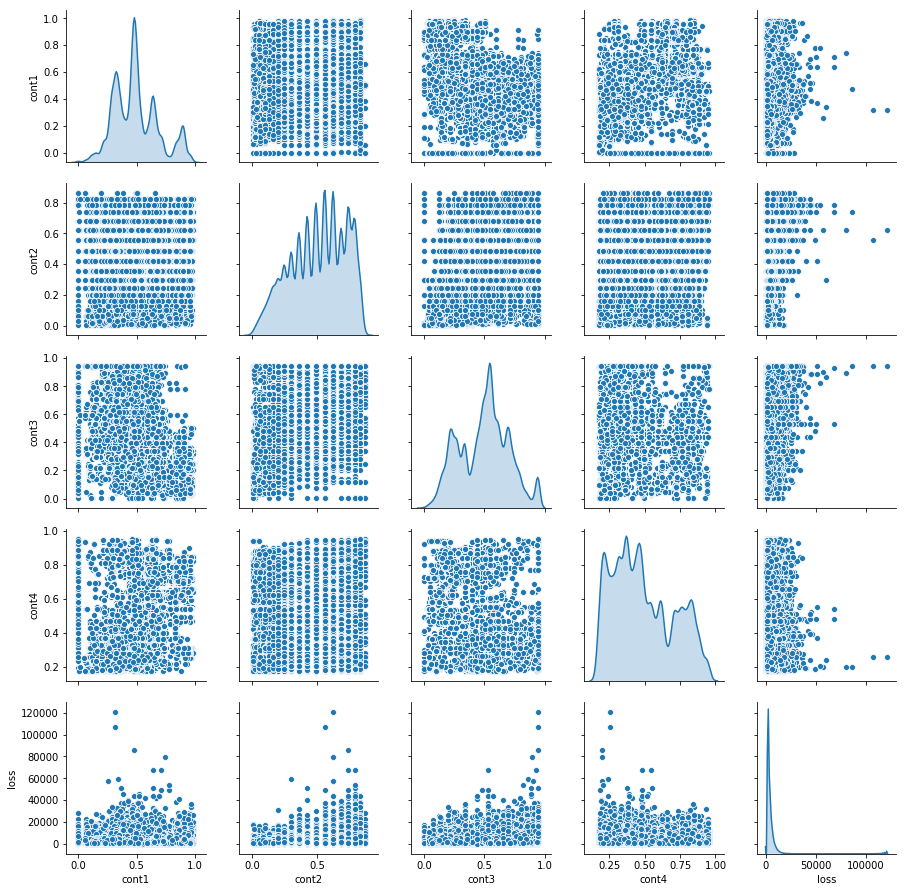

In [42]:
sns.pairplot(
    df_train[continuous_types],
    vars=['cont1','cont2','cont3','cont4','loss'],
    kind = 'scatter',
    diag_kind='kde')

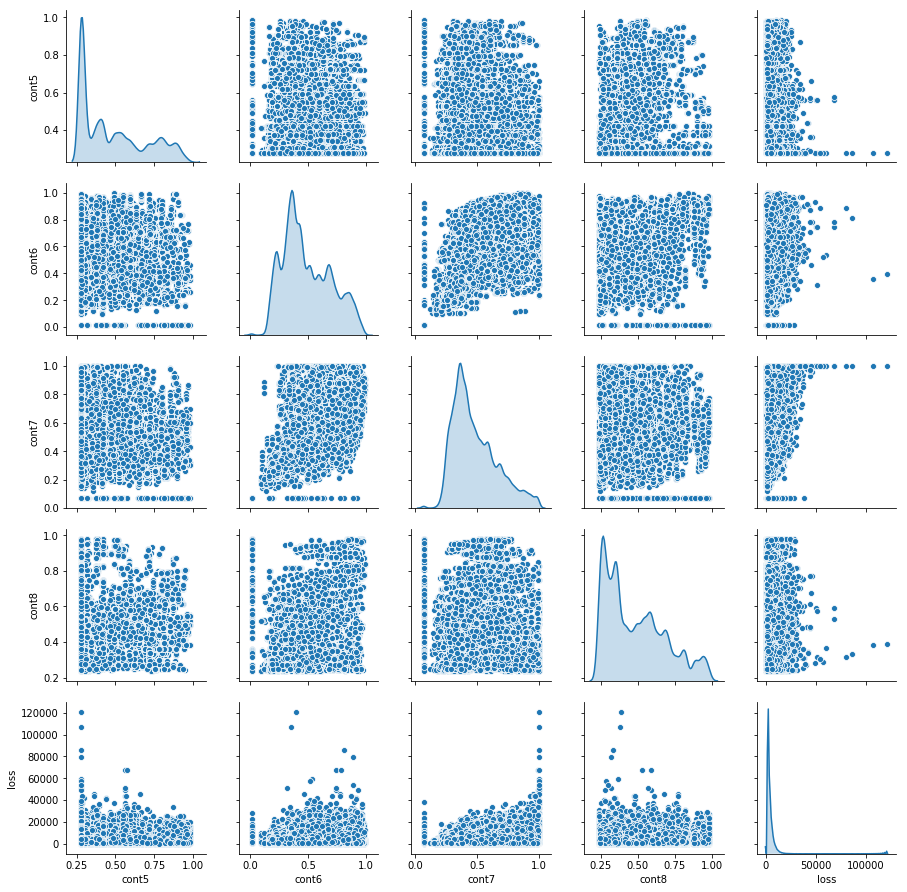

In [43]:
sns.pairplot(
    df_train[continuous_types],
    vars=['cont5','cont6','cont7','cont8','loss'],
    kind = 'scatter',
    diag_kind='kde')

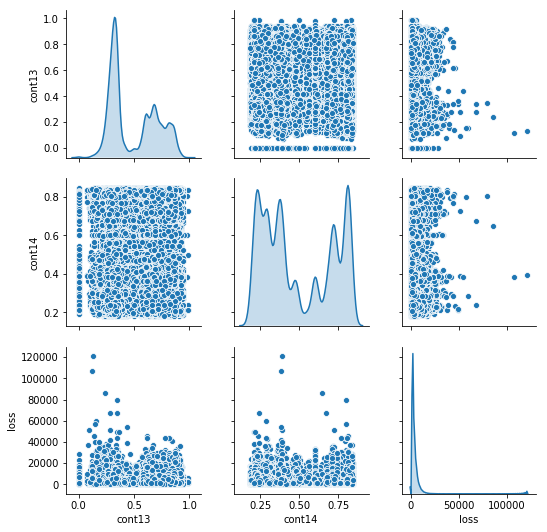

In [44]:
sns.pairplot(
    df_train[continuous_types],
    vars=['cont13','cont14','loss'],
    kind = 'scatter',
    diag_kind='kde')

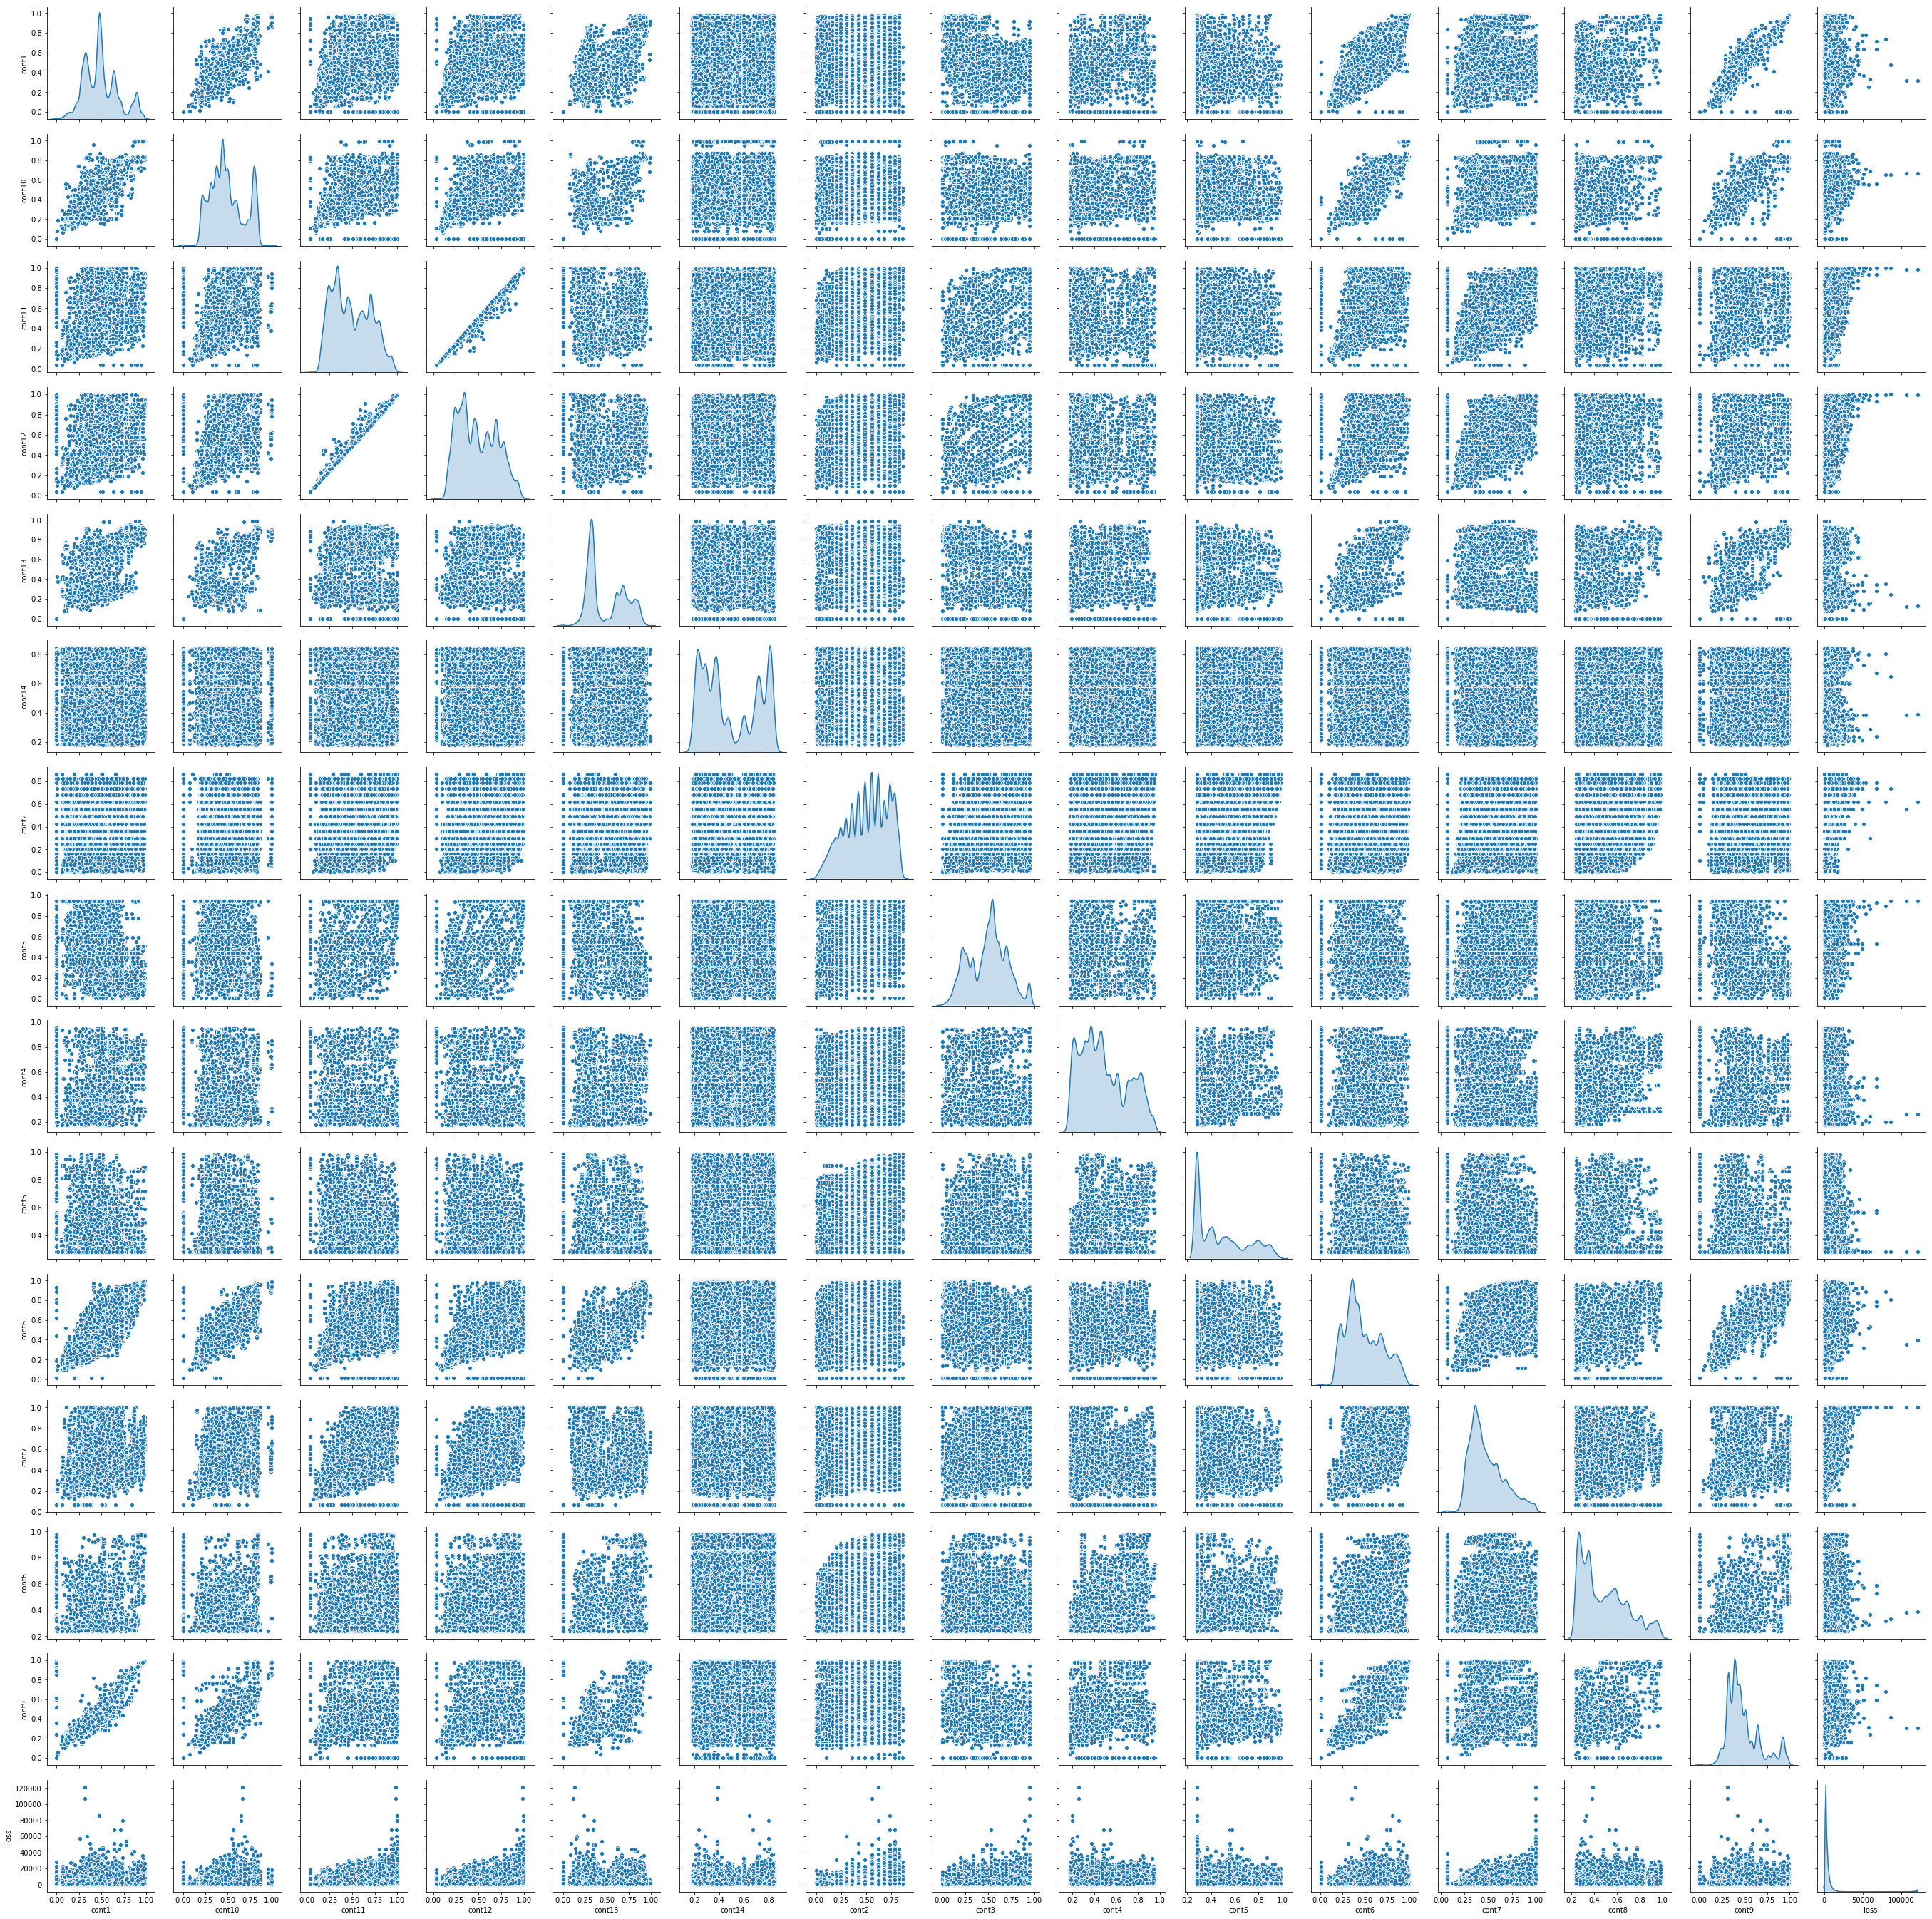

In [45]:
sns.pairplot(
    df_train[continuous_types],
    kind = 'scatter',
    diag_kind='kde')

### Matrix correlation: continuous features

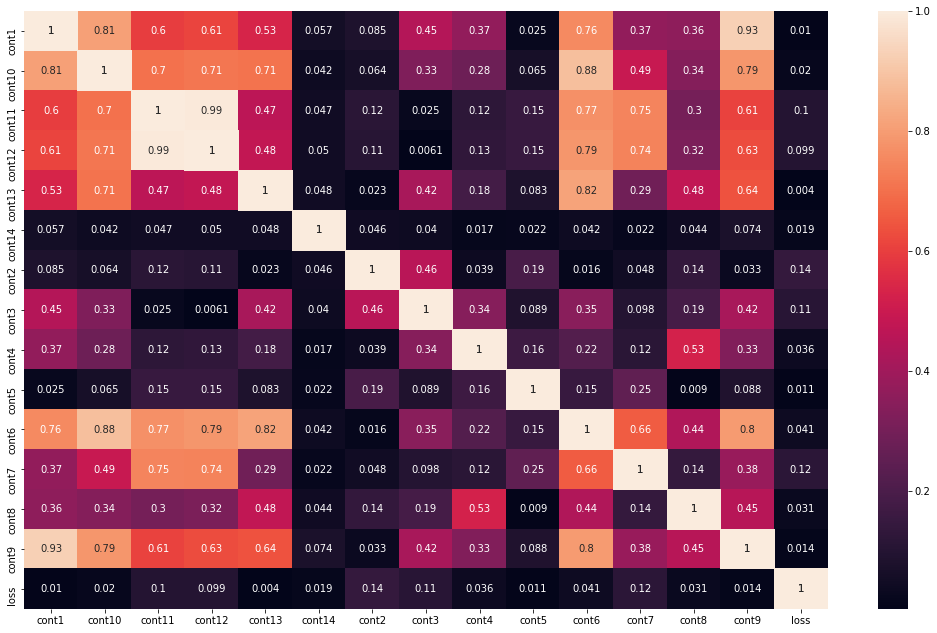

In [46]:
correlationMatrix = df_train[continuous_types].corr().abs()

plt.subplots(figsize=(18, 11))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix,
            mask=correlationMatrix < 1,
            cbar=False,
            linecolor='white',
            annot = True)
plt.show()

It`s possible see correlations exists between some of the continuous variables.
In this case, the correlations score between cont10 and cont11 is 0.7. 

### Categorical features

### Best correlation in categorical feature

In [121]:
corrCatMatrix = data_copy[categorical_types].corr().abs()

s = corrCatMatrix.unstack()
sortedSeries = s.sort_values(kind="quicksort",ascending=False)
best_correlation_categorical = sortedSeries[sortedSeries != 1.0][0:10]

print("Top correlated categorical feature pairs: \n")
print(best_correlation_categorical)

Top correlated categorical feature pairs: 

cat90   cat3      0.956610
cat3    cat90     0.956610
cat89   cat7      0.951530
cat7    cat89     0.951530
cat9    cat2      0.932173
cat2    cat9      0.932173
cat6    cat50     0.926161
cat50   cat6      0.926161
cat116  cat104    0.919646
cat104  cat116    0.919646
dtype: float64


## Split train and test
- The variable Shift is applied to the log transformation.

In [58]:
# split into training and test sets
shift = 200

# create target label
X_train = df_train[continuous_features]
y_train = np.log(df_train['loss'] + shift)

X_test = df_test[continuous_features]

In [59]:
X_train.head()

cont1   cont10    cont11    cont12    cont13    cont14     cont2  \
0  0.726300  0.83510  0.569745  0.594646  0.822493  0.714843  0.245921   
1  0.330514  0.43919  0.338312  0.366307  0.611431  0.304496  0.737068   
2  0.261841  0.32446  0.381398  0.373424  0.195709  0.774425  0.358319   
3  0.321594  0.44467  0.327915  0.321570  0.605077  0.602642  0.555782   
4  0.273204  0.21230  0.204687  0.202213  0.246011  0.432606  0.159990   

      cont3     cont4     cont5     cont6     cont7    cont8    cont9  
0  0.187583  0.789639  0.310061  0.718367  0.335060  0.30260  0.67135  
1  0.592681  0.614134  0.885834  0.438917  0.436585  0.60087  0.35127  
2  0.484196  0.236924  0.397069  0.289648  0.315545  0.27320  0.26076  
3  0.527991  0.373816  0.422268  0.440945  0.391128  0.31796  0.32128  
4  0.527991  0.473202  0.704268  0.178193  0.247408  0.24564  0.22089

In [60]:
X_test.head()

cont1   cont10    cont11    cont12    cont13    cont14     cont2  \
0  0.321594  0.38016  0.377724  0.369858  0.704052  0.392562  0.299102   
1  0.634734  0.60401  0.689039  0.675759  0.453468  0.208045  0.620805   
2  0.290813  0.30529  0.245410  0.241676  0.258586  0.297232  0.737068   
3  0.268622  0.31480  0.348867  0.341872  0.592264  0.555955  0.681761   
4  0.553846  0.50556  0.359572  0.352251  0.301535  0.825823  0.299102   

      cont3     cont4     cont5     cont6     cont7    cont8    cont9  
0  0.246911  0.402922  0.281143  0.466591  0.317681  0.61229  0.34365  
1  0.654310  0.946616  0.836443  0.482425  0.443760  0.71330  0.51890  
2  0.711159  0.412789  0.718531  0.212308  0.325779  0.29758  0.34365  
3  0.592681  0.354893  0.397069  0.369930  0.342355  0.40028  0.33237  
4  0.263570  0.696873  0.302678  0.398862  0.391833  0.23688  0.43731

In [61]:
y_train.head()

0    7.788701
1    7.302227
2    8.072495
3    7.038652
4    7.994244
Name: loss, dtype: float64

In [62]:
# check distribuition
print ("Xtrain shape:", X_train.shape[0])
print ("ytrain shape:", X_train.shape[1])
print ("Xtest shape:", X_test.shape[0])
print ("ytest shape:", X_test.shape[1])

Xtrain shape: 188318
ytrain shape: 14
Xtest shape: 125546
ytest shape: 14


## Benchmarks

We will test and execute the models:
- Linear Regression
- XGBoost
- Random Forest (Bagging)

## Linear Regression

In [63]:
# initialize Linear Regression
model_lr = LinearRegression()

In [34]:
# Train the model using the training sets
model_lr.fit(X_train, y_train)
print("---Traing Done---")

---Traing Done---


In [35]:
# Predict using the trained model 
y_prd_lr = model_lr.predict(X_test)
print("y_prd_lr:\n", +y_prd_lr)

y_prd_lr:
 [7.666939   7.7550694  7.85142807 ... 7.87669522 7.67572981 7.66427509]


In [63]:
# Submission

id_test = df_test['id']

sub = pd.DataFrame()
sub['id'] = id_test
sub['loss'] = y_prd_lr
sub.to_csv('lin_regression_submission.csv', index=False, encoding='UTF8')

## Random Forest

### Manually fine-tune the Random Forest Regressor

- The traning and test it`s in function because garanted reuse.
- The predictions running in validation set in each fold.
- Garanted with array is the inverse of the log transformation about column loss.

In [64]:
def train_model(model, num_folds):
    """Train model"""
    
    print("Begin training")
    start = time.time()
    
    # declare a KFold instance
    kfold = KFold(n_splits = num_folds, random_state = 10)
    
    # number of models
    num_models = 1
    
    # array to store results after each fold
    results = []
    
    # train K-1 Random Forests
    for i, (train, val) in enumerate(kfold.split(X_train)):
        # get smaller training set and create validation set
        X_train_mini, X_val = X_train.iloc[train], X_train.iloc[val]
        y_train_mini, y_val = y_train[train], y_train[val]

        # train model
        model.fit(X_train_mini, y_train_mini)

        # make predictions 
        preds = model.predict(X_val)
        
        # absolute error
        error = mean_absolute_error(np.exp(y_val) - shift, np.exp(preds) - shift)
        print("MAE on fold {} is {}".format(i, error))
        
        # done
        results.append(error)
    
    end = time.time()
    print("Training done! Time Elapsed:", end - start)

    # Error over k folds
    avg_error = np.mean(results)
    print(avg_error)

- The number of estimators go is tested.

In [34]:
# create instances of the Random Forest Regressor.  
rf_regressor = RandomForestRegressor(random_state = 10, n_jobs = -1)
train_model(model = rf_regressor, num_folds = 5)

Begin training
MAE on fold 0 is 1939.432584766646
MAE on fold 1 is 1934.4447034214004
MAE on fold 2 is 1950.7153733985147
MAE on fold 3 is 1948.612610175804
MAE on fold 4 is 1949.8975318847224
Training done! Time Elapsed: 18.729899883270264
1944.6205607294173


- Update the number of estimators to 20 to see how the model performs. 

In [35]:
rf_regressor = RandomForestRegressor(n_estimators = 20, n_jobs = -1)
train_model(model = rf_regressor, num_folds = 5)

Begin training
MAE on fold 0 is 1909.823849658023
MAE on fold 1 is 1903.5882915619816
MAE on fold 2 is 1918.0732836973432
MAE on fold 3 is 1915.0773341208194
MAE on fold 4 is 1913.299266812582
Training done! Time Elapsed: 29.948988676071167
1911.9724051701498


- Update the number of estimators to 30 to see how the model performs. 

In [39]:
rf_regressor = RandomForestRegressor(n_estimators = 100, n_jobs = -1)
train_model(model = rf_regressor, num_folds = 5)

Begin training
MAE on fold 0 is 1880.9210504343964
MAE on fold 1 is 1877.5753904843502
MAE on fold 2 is 1894.0123545790516
MAE on fold 3 is 1890.0372386132833
MAE on fold 4 is 1887.899834365895
Training done! Time Elapsed: 145.44870781898499
1886.0891736953956


#### Analysis of Results
- The increasing the number of estimators improved score.
- The best results produced with n_estimators = 100 on fold 2.
- The problem is time process which grows in the same proportion. 

In [ ]:
# Submission

id_test = df_test['id']

sub = pd.DataFrame()
sub['id'] = id_test
sub['loss'] = rf_regressor
sub.to_csv('random_forest_submission.csv', index=False, encoding='UTF8')

## XGBoost
- Model very robust
- descentent gradient 
- regularization parameter: help avoid overfitting
- parallelizable

In [ ]:
xgb = XGBRegressor(silent = True, seed = 15, nthread = -1)
train_model(model = xgb, num_folds = 5)

Begin training


In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

ID = 'id'
TARGET = 'loss'
SEED = 0



train = pd.read_csv('~/projetos/challenges/kaggle/allstate-claims-severity/data_base/train.csv')
test = pd.read_csv('~/projetos/challenges/kaggle/allstate-claims-severity/data_base/test.csv')

y_train = np.log(train[TARGET].ravel())

train.drop([ID, TARGET], axis=1, inplace=True)
test.drop([ID], axis=1, inplace=True)

print("{},{}".format(train.shape, test.shape))

(188318, 130),(125546, 130)


In [2]:
ntrain = train.shape[0]
train_test = pd.concat((train, test)).reset_index(drop=True)

features = train.columns

cats = [feat for feat in features if 'cat' in feat]
for feat in cats:
    train_test[feat] = pd.factorize(train_test[feat], sort=True)[0]

print(train_test.head())

   cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10    ...     \
0     0     1     0     1     0     0     0     0     1      0    ...      
1     0     1     0     0     0     0     0     0     1      1    ...      
2     0     1     0     0     1     0     0     0     1      1    ...      
3     1     1     0     1     0     0     0     0     1      0    ...      
4     0     1     0     1     0     0     0     0     1      1    ...      

      cont5     cont6     cont7    cont8    cont9   cont10    cont11  \
0  0.310061  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745   
1  0.885834  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312   
2  0.397069  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398   
3  0.422268  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915   
4  0.704268  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687   

     cont12    cont13    cont14  
0  0.594646  0.822493  0.714843  
1  0.366307  0.611431  0.304496  
2  0.373

In [1]:
# x_train = np.array(train_test.iloc[:ntrain,:])
# x_test = np.array(train_test.iloc[ntrain:,:])

# print("{},{}".format(train.shape, test.shape))

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

NameError: name 'xgb' is not defined

In [2]:
xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'reg:linear',
    'max_depth': 6,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'eval_metric': 'mae',
}

In [ ]:
def xg_eval_mae(yhat, dtrain):
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y), np.exp(yhat))

res = xgb.cv(xgb_params, dtrain, seed=0, maximize=False)


In [3]:
dtrain = xgb.DMatrix(df_train[cat_columns+cont_columns], label =np.log1p(df_train['loss']))

NameError: name 'xgb' is not defined

In [ ]:
gc.collect()

comparar estes 3 modelos será analisado qual tem o menor erro absoluto médio

XGBoost and MLP baseline gave the least Mean Average Error(MAE).These perform the best.

In [4]:
# Custom eval metric
def eval_error(preds, dtrain):
    """Custom evaluation function"""
    labels = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(preds), np.exp(labels))

In [ ]:
def train_xgboost(model, num_folds, early_stopping_rounds):
    """Train model and average the results"""
    
    print("Begin training")
    start = time.time()
    
    # declare a KFold instance
    kfold = KFold(n_splits = num_folds, random_state = random_state)
    
    # number of models
    num_models = 1
    
    # array to store results after each fold
    results = []
    
    # train K-1 Random Forests using K-Folds CV
    for i, (train, val) in enumerate(kfold.split(X_train)):
        # get smaller training set and create validation set
        X_train_mini, X_val = X_train.iloc[train], X_train.iloc[val]
        y_train_mini, y_val = y_train[train], y_train[val]

        # train Random Forest Regressor
        model.fit(X_train_mini, 
                  y_train_mini,
                  eval_set = [(X_train_mini, y_train_mini), (X_val, y_val)], 
                  early_stopping_rounds = early_stopping_rounds,
                  eval_metric = eval_error,
                  verbose = False)

        # make predictions 
        preds = model.predict(X_val, ntree_limit = model.best_ntree_limit)
        
        # calculate mean absolute error
        error = mean_absolute_error(np.exp(y_val) - shift, np.exp(preds) - shift)
        print("MAE on fold {} is {}".format(i, error))
        
        # store result
        results.append(error)
        
        # best tree limit
        print("Optimal number of boosted trees on fold {} is {} \n".format(i, model.best_ntree_limit))
    
    end = time.time()
    print("Training complete! Time Elapsed:", end - start)

    # get average error over k folds
    avg_error = np.mean(results)
    print(avg_error)

In [ ]:
xgb = XGBRegressor(n_estimators = 8000,
                   silent = True, 
                   seed = 16, 
                   nthread = -1)
train_xgboost(model = xgb, 
              num_folds = 5,
              early_stopping_rounds = 50)

In [ ]:
# a new xgboost instance with fine-tuned parameters
xgb = XGBRegressor(n_estimators = 8000,
                   max_depth = 7,
                   min_child_weight = 5.4,
                   gamma = 0.0,
                   subsample = 1.0,
                   colsample_bytree = 1.0,
                   reg_alpha = 10.0,
                   silent = True, 
                   seed = random_state, 
                   nthread = -1)

results = train_test_xgboost(model = xgb, early_stopping_rounds = 50)